# Case Study : Analysis on superstore dataset

## Steps for data analysis
### 1.Gathering data
### 2.Understanding the data
### 3.Cleaning the dataset
### 4.Statistical Analysis
### 5.Visualization

### We are using sample superstore dataset that is available on kaggle.
link :https://www.kaggle.com/datasets/bravehart101/sample-supermarket-dataset

#### Importing the dataset and understanding it

In [1]:
# importing necessary libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset using pandas read_csv()
df=pd.read_csv("C:\\Users\\NIDHI\\Downloads\\SampleSuperstore.csv~\\SampleSuperstore.csv")

In [3]:
#First 5 entries of dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#shape of dataset
df.shape
#9994 rows and 13 columns

(9994, 13)

In [5]:
df.columns #list of columns in dataset

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### Lets understand each feature in dataset


In [6]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.isnull().sum() #no null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='Count'>

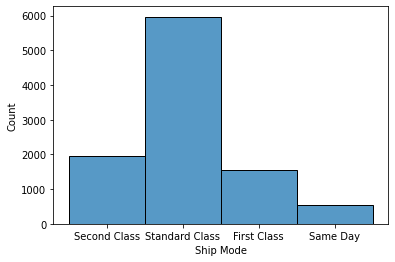

In [9]:
sns.histplot(x='Ship Mode',data=df)


##### As we can see standard class is the most used shipping mode 

<AxesSubplot:xlabel='Ship Mode', ylabel='Count'>

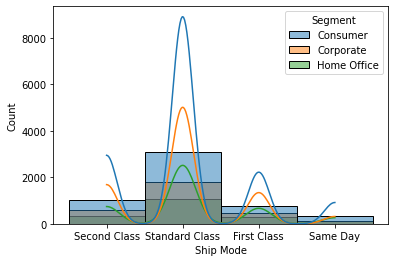

In [10]:
sns.histplot(x='Ship Mode',data=df,kde=True,hue='Segment')

<AxesSubplot:xlabel='Segment', ylabel='Count'>

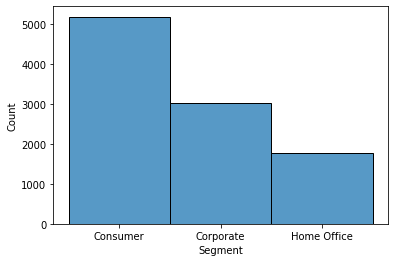

In [11]:
sns.histplot(x='Segment',data=df)

#### Consumer segment is the highest one

<AxesSubplot:xlabel='Segment', ylabel='Count'>

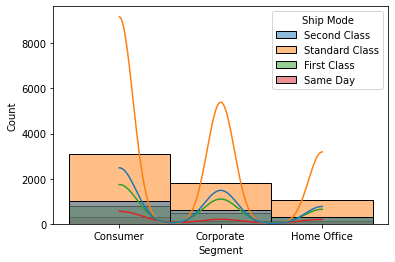

In [12]:
sns.histplot(x='Segment',data=df,hue='Ship Mode',kde=True)

<AxesSubplot:xlabel='Category', ylabel='Count'>

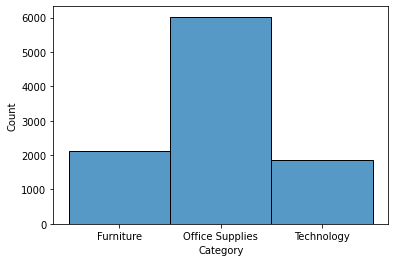

In [13]:
sns.histplot(x='Category',data=df)

<AxesSubplot:xlabel='Category', ylabel='Sales'>

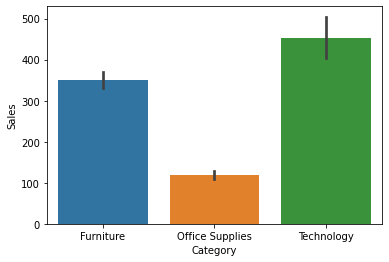

In [14]:
sns.barplot(x='Category',y='Sales',data=df)

#### Technology records highest sales

<AxesSubplot:xlabel='Category', ylabel='Profit'>

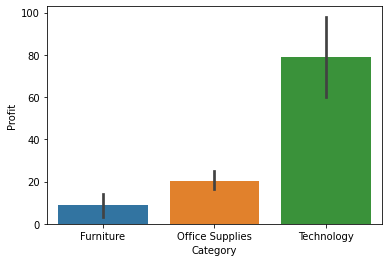

In [15]:
sns.barplot(x='Category',y='Profit',data=df)

#### Profit is highest in technology and lowest in furniture category

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

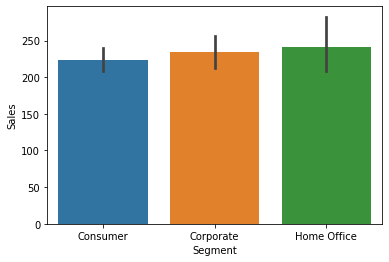

In [16]:
sns.barplot(x='Segment',y='Sales',data=df)

# Home office segment records highest sales

<AxesSubplot:xlabel='Category', ylabel='Profit'>

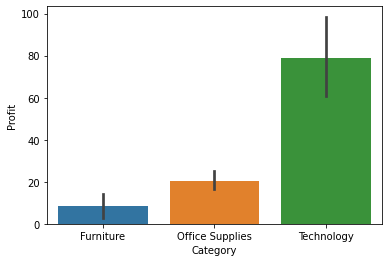

In [17]:
sns.barplot(x='Category',y='Profit',data=df)

### Technology category records highest sales

In [18]:
df_city=pd.DataFrame(df.groupby('City')['Sales'].sum())
df_city.reset_index(inplace=True)

In [19]:
df_topCity=pd.DataFrame(df_city.sort_values(by='Sales',ascending=False)[:10])
df_topCity.reset_index(inplace=True)

### Top 10 cities that records highest sales 
New York city records highest sales

<AxesSubplot:xlabel='City', ylabel='Sales'>

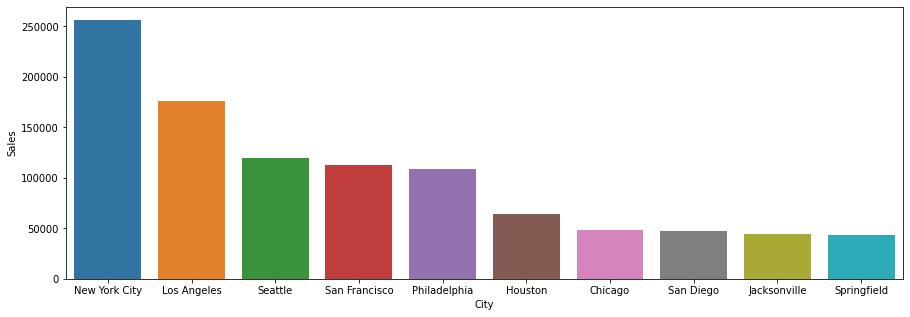

In [20]:
plt.figure(figsize=(15, 5))
sns.barplot(x='City',y='Sales',data=df_topCity)

## Highest selling categories

In [21]:
df_cat=df.groupby('Category')['Sales','Profit'].sum()

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_20700\3498630035.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cat=df.groupby('Category')['Sales','Profit'].sum()


In [22]:
df_cat.reset_index(inplace=True)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

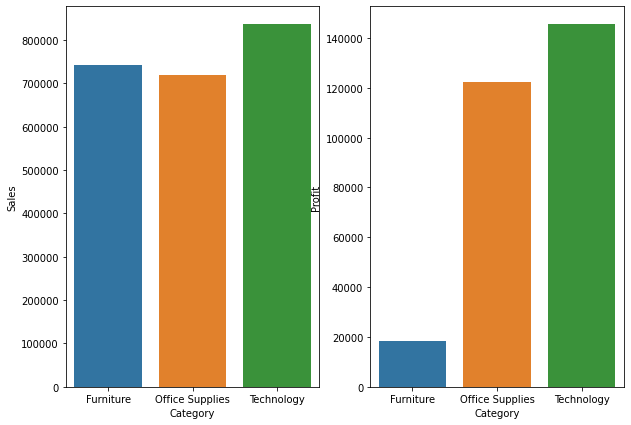

In [23]:
fig, axes = plt.subplots(1, 2,figsize=(10,7))
sns.barplot(ax=axes[0], x='Category', y='Sales',data=df_cat)
sns.barplot(ax=axes[1], x='Category', y='Profit',data=df_cat)

## Top 10 cities with highest profit

In [24]:
df_city_pro=pd.DataFrame(df.groupby('City')['Profit'].sum())
df_city_pro.reset_index(inplace=True)

In [26]:
df_profit_city=pd.DataFrame(df_city_pro.sort_values(by='Profit',ascending=False)[:10])

<AxesSubplot:xlabel='City', ylabel='Profit'>

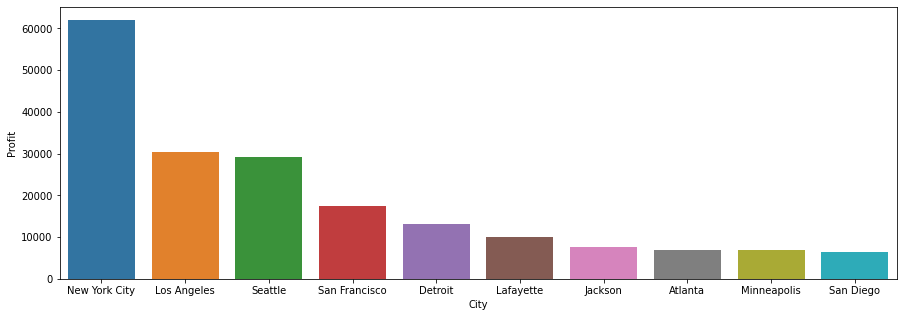

In [27]:
plt.figure(figsize=(15, 5))
sns.barplot(x='City',y='Profit',data=df_profit_city)

## Top 10 Sub-Categories

In [28]:
df_subcat=pd.DataFrame(df.groupby('Sub-Category')['Sales'].sum())


In [29]:
df_subcat10=df_subcat.sort_values(by='Sales',ascending=False)[:10]
df_subcat10.reset_index(inplace=True)

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

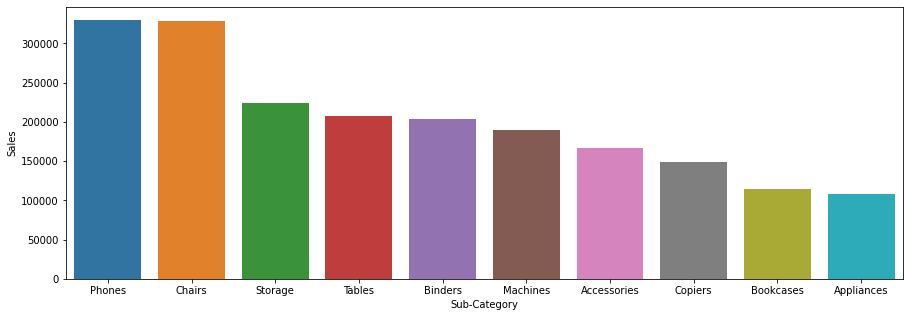

In [30]:
plt.figure(figsize=(15, 5))
sns.barplot(x='Sub-Category',y='Sales',data=df_subcat10)

## Top 10 states with high sales

In [31]:
df_state=pd.DataFrame(df.groupby('State')['Sales'].sum())

In [32]:
df_state10=df_state.sort_values(by='Sales',ascending=False)[:10]
df_state10.reset_index(inplace=True)

<AxesSubplot:xlabel='State', ylabel='Sales'>

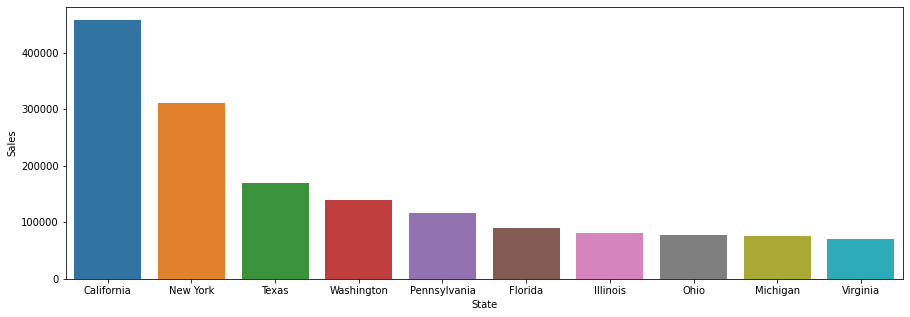

In [33]:
plt.figure(figsize=(15, 5))
sns.barplot(x='State',y='Sales',data=df_state10)

## Most sold category

In [40]:
df_quant=pd.DataFrame(df.groupby('Category')['Quantity'].sum())

In [41]:
df_quant.reset_index(inplace=True)

<AxesSubplot:xlabel='Category', ylabel='Quantity'>

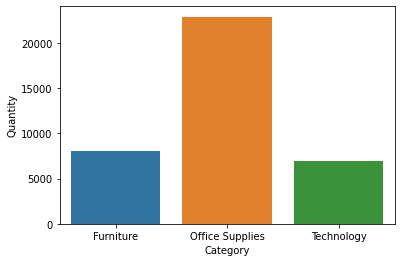

In [42]:
sns.barplot(x='Category',y='Quantity',data=df_quant)

### Most sold sub-category

In [43]:
df_quant_sub=pd.DataFrame(df.groupby('Sub-Category')['Quantity'].sum())

In [44]:
df_quant_sub.reset_index(inplace=True)

<AxesSubplot:xlabel='Sub-Category', ylabel='Quantity'>

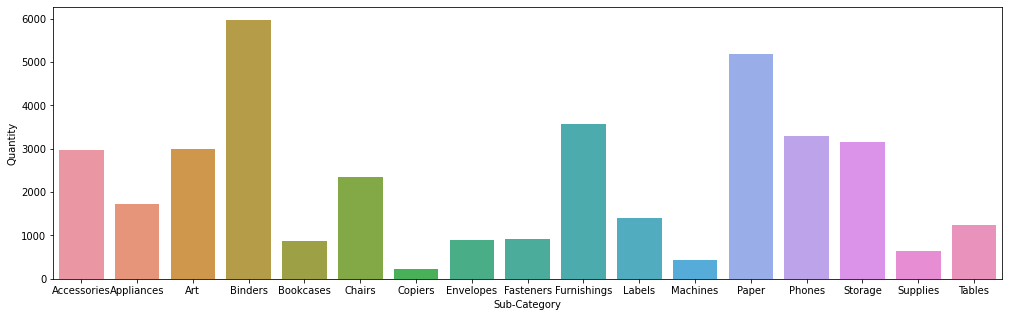

In [51]:
plt.figure(figsize=(17,5))
sns.barplot(x='Sub-Category',y='Quantity',data=df_quant_sub)

In [53]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000
